# This doc contain lending club case study for people who can default loan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/loan.csv")

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.shape

(39717, 111)

In [6]:
df.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [7]:
missing_info = pd.DataFrame(df.isna().sum().sort_values(ascending=False)).reset_index()
missing_info.rename(columns={'index' : 'col_name',0: 'null_count'}, inplace=True)

In [8]:
missing_info['missing_per'] = missing_info['null_count']/df.shape[0]*100

In [9]:
missing_info

,col_name,null_count,missing_per
0,verification_status_joint,39717,100.0
1,annual_inc_joint,39717,100.0
2,mo_sin_old_rev_tl_op,39717,100.0
3,mo_sin_old_il_acct,39717,100.0
4,bc_util,39717,100.0
...,...,...,...
106,delinq_amnt,0,0.0
107,policy_code,0,0.0
108,earliest_cr_line,0,0.0
109,delinq_2yrs,0,0.0


In [10]:
# getting column missing info more than 40%
missing_col = missing_info[missing_info['missing_per']>40]['col_name'].to_list()

In [11]:
len(missing_col)

57

In [12]:
df1 = df.drop(labels=missing_col, axis=1)

In [13]:
df1.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0       36 months   10.65%       162.87     B  

In [86]:
# if all the data in the column in Nan we will drop that column
# df1.dropna(axis=1, how = "all", inplace = True)

In [14]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [15]:
df1.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0       36 months   10.65%       162.87     B  

In [16]:
# we are trying to find the duplicate data in columns
remove_col_list = []
for i in df1.columns:
    if df1[i].nunique() == 1:
        remove_col_list.append(i)

In [17]:
remove_col_list

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [18]:
# dropping the column which have duplicate data
df1.drop(remove_col_list, axis = 1, inplace = True)

In [19]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [21]:
# checking for the duplicated row
df1[df1.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [22]:
df1 = df1[df1["loan_status"].str.lower() != "current"]

In [118]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [119]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [24]:
# dropping the not required column
drop_cols = [
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'earliest_cr_line',
 'emp_title',
 'id',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'member_id',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'revol_util',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'zip_code'
]

df1.drop(drop_cols, axis = 1, inplace = True)

In [121]:
df1.shape

(38577, 18)

In [122]:
df1.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

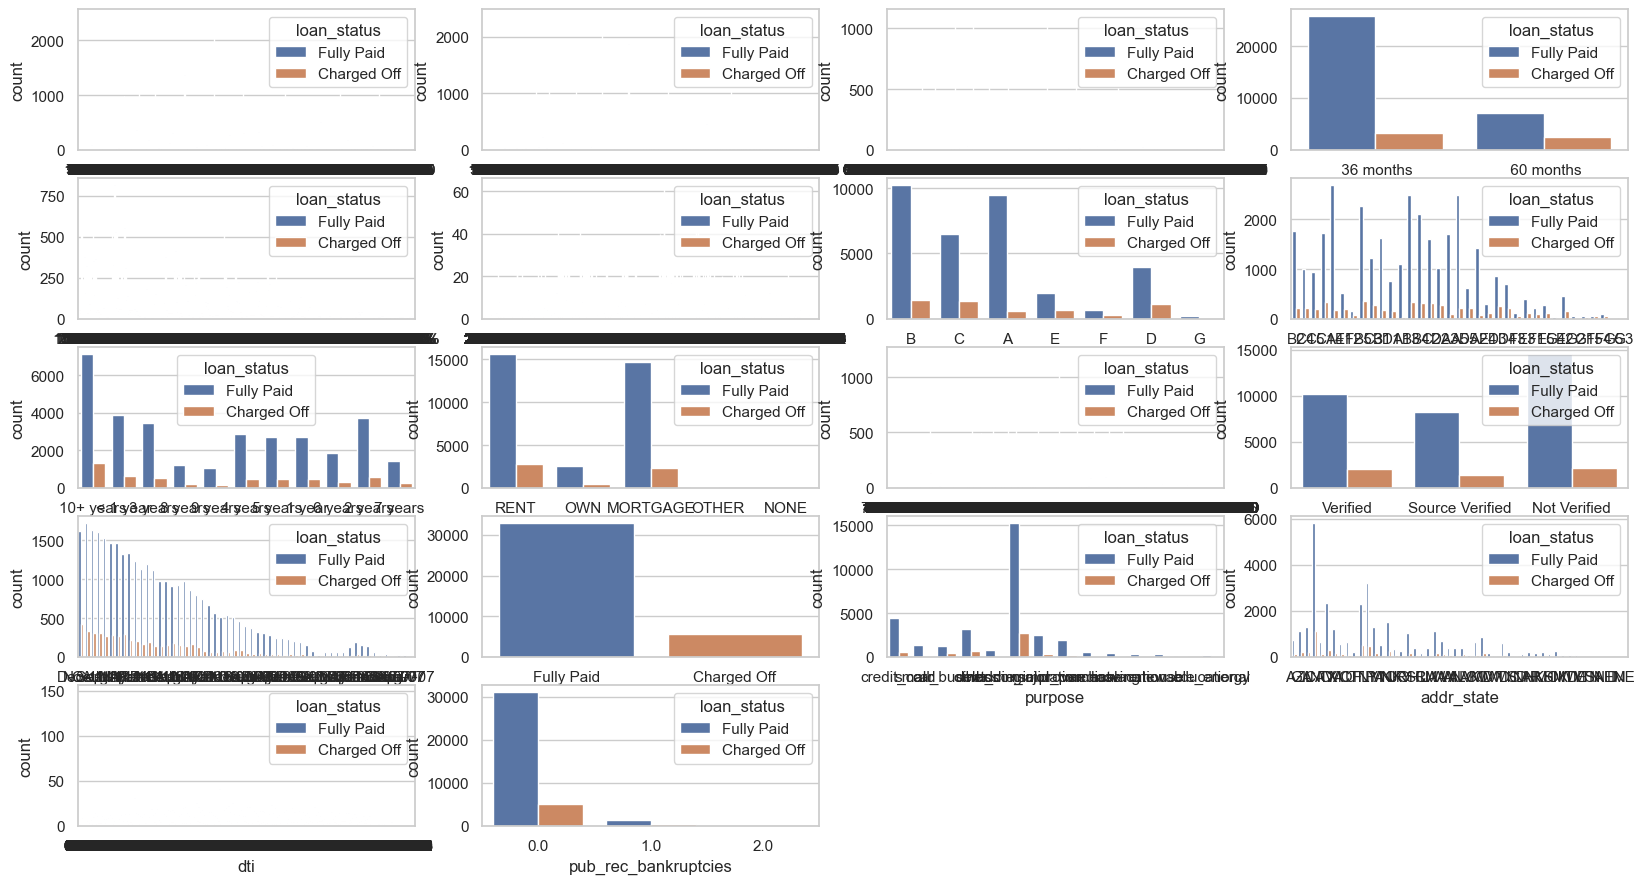

In [126]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(df1):
 plt.subplot(7, 4, i+1)
 sns.countplot(data=df1, x=col, hue='loan_status')
    

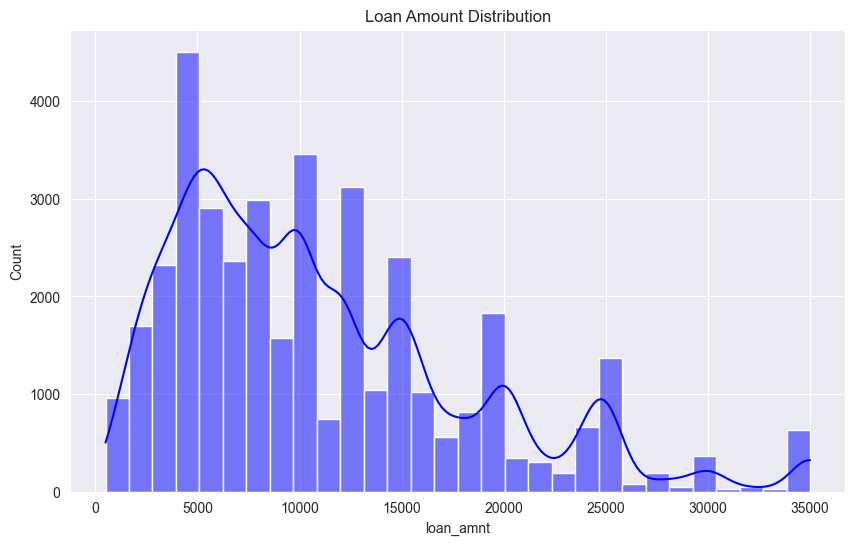

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['loan_amnt'], bins=30, kde=True, color='blue')
plt.title("Loan Amount Distribution")
plt.show()


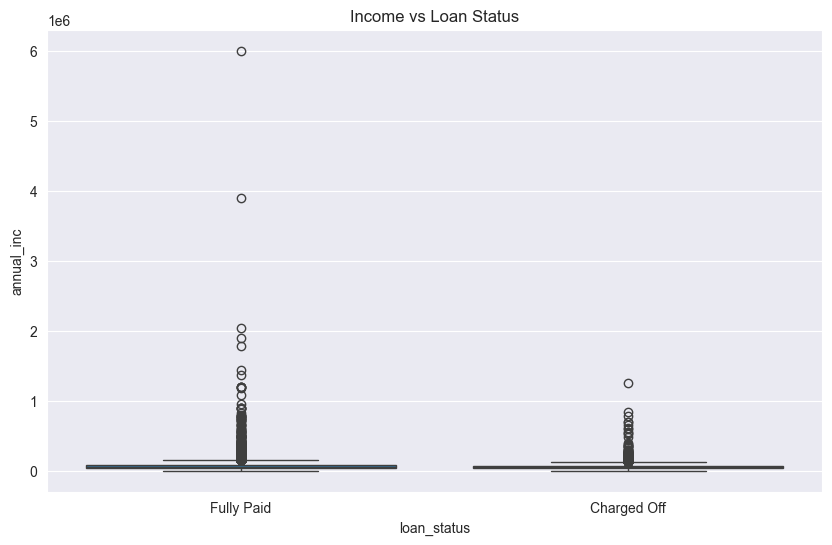

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=df1)
plt.title("Income vs Loan Status")
plt.show()


In [29]:
df1['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [32]:
df1['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [33]:
df1 = df1[df1['annual_inc'] < 100000]
df1.shape

(32598, 18)

In [36]:
missing_data_per = (df.shape[0] - df1.shape[0])/df.shape[0]*100
print(missing_data_per)

17.924314525266258


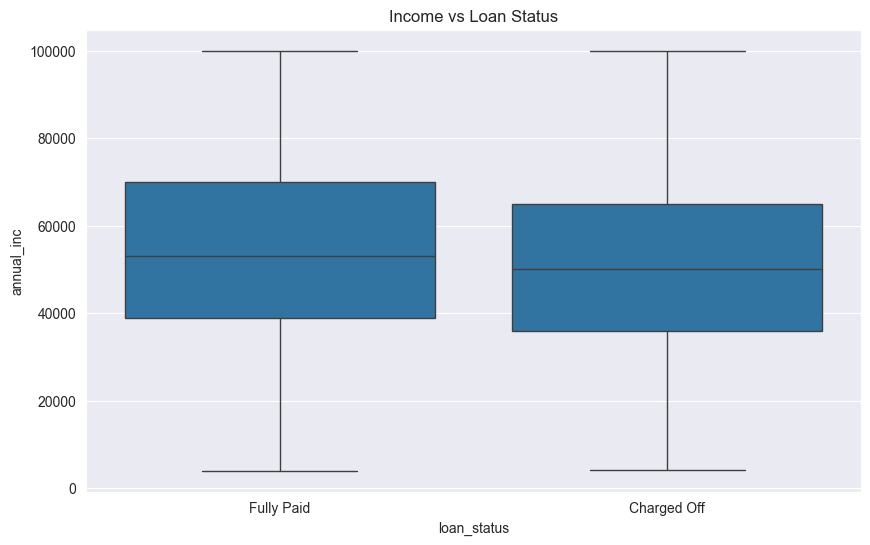

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=df1)
plt.title("Income vs Loan Status")
plt.show()

In [29]:
df2 = df[df['annual_inc'] < 200000]

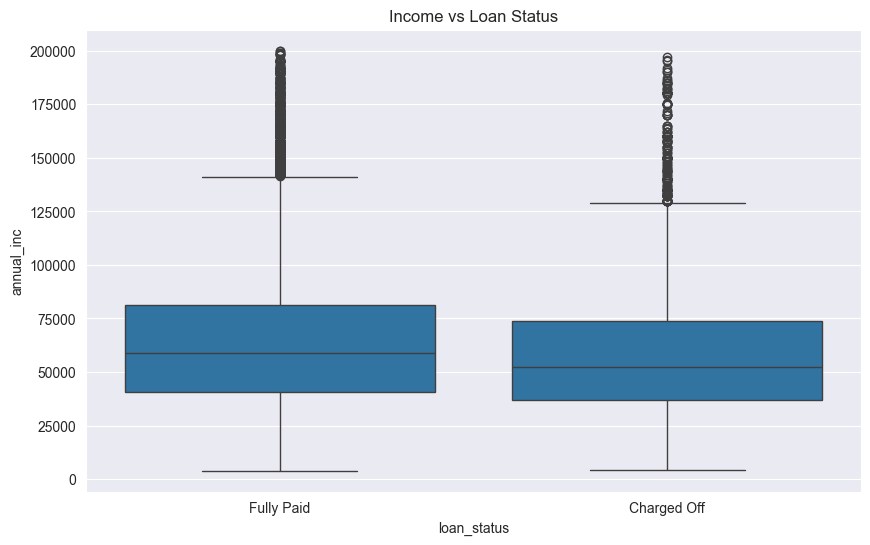

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=df2)
plt.title("Income vs Loan Status")
plt.show()

In [31]:
df3 = df[df['annual_inc'] > 100000]
df3.shape

(5481, 18)

In [32]:
df3 = df3[df3['annual_inc'] < 200000]

In [33]:
df3.shape

(4792, 18)

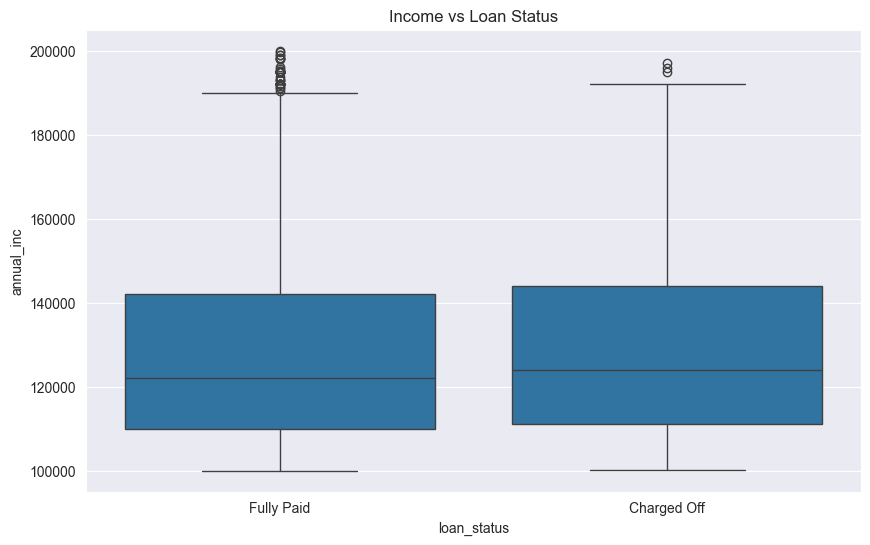

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=df3)
plt.title("Income vs Loan Status")
plt.show()

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32598 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             32598 non-null  int64  
 1   funded_amnt           32598 non-null  int64  
 2   funded_amnt_inv       32598 non-null  float64
 3   term                  32598 non-null  object 
 4   int_rate              32598 non-null  object 
 5   installment           32598 non-null  float64
 6   grade                 32598 non-null  object 
 7   sub_grade             32598 non-null  object 
 8   emp_length            31616 non-null  object 
 9   home_ownership        32598 non-null  object 
 10  annual_inc            32598 non-null  float64
 11  verification_status   32598 non-null  object 
 12  issue_d               32598 non-null  object 
 13  loan_status           32598 non-null  object 
 14  purpose               32598 non-null  object 
 15  addr_state            32

In [43]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [44]:
df1['int_rate'] = df1['int_rate'].str.rstrip('%').astype(float)

In [53]:
df1.columns = df1.columns.str.strip()

In [54]:
df1.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies
count,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32011.000000
mean,10102.899718,9883.598687,9370.607488,11.839304,295.479826,54027.190404,13.630388,0.045984
std,6617.008245,6384.639454,6317.102066,3.623922,186.182484,20661.629461,6.687809,0.210199
min,500.000000,500.000000,0.000000,5.420000,15.690000,4000.000000,0.000000,0.000000
25%,5000.000000,5000.000000,4800.000000,8.900000,157.820000,38004.000000,8.520000,0.000000
50%,8500.000000,8400.000000,8000.000000,11.710000,257.800000,52000.000000,13.820000,0.000000
75%,14000.000000,13200.000000,12475.000000,14.270000,389.360000,70000.000000,18.970000,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1302.690000,99999.000000,29.990000,2.000000


In [56]:
df1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

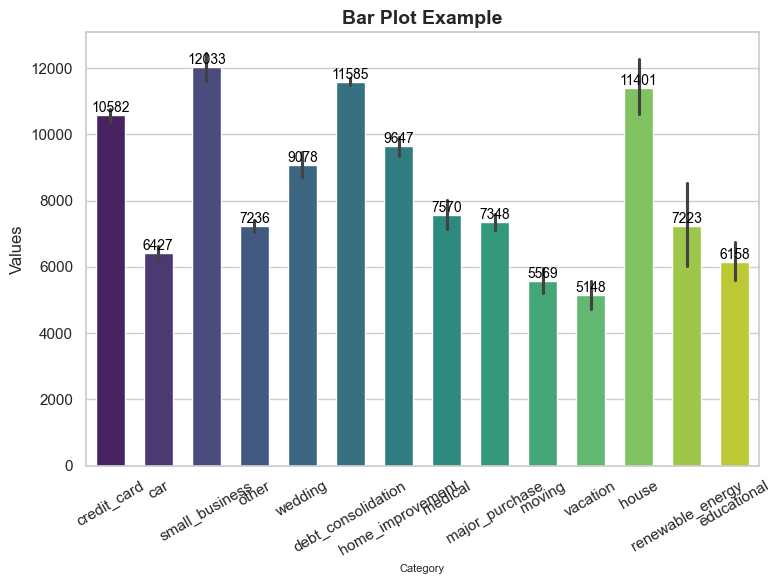

In [62]:
# loan_amt_threshold = [5000,10000,15000]
# loan_amt_labels  = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
# bucket_data = 
# df['loan_amt_bucket'] = df['loan_amt'].apply(bucket_data, args=(loan_amt_thresholds, loan_amt_labels))
# df[['loan_amt', 'loan_amt_bucket']]
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

# Correct column names for x and y
ax = sns.barplot(data=df1, x='purpose', y='loan_amnt', palette='viridis', width=0.6)

# Add value annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.xticks(rotation=30)
# Add labels and title
plt.title("Bar Plot Example", fontsize=14, weight='bold')
plt.xlabel("Category", fontsize=8)
plt.ylabel("Values", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()